In [1]:
#!pip install vaderSentiment-fr
#!pip install python-Levenshtein
#!pip install spacy
#!python -m spacy download fr_core_news_sm
#!python -m spacy download fr_core_news_lg
#!pip install stanfordnlp
#!pip install transformers
#!pip install sacremoses
#!pip install nltk

In [2]:
from vaderSentiment_fr.vaderSentiment import SentimentIntensityAnalyzer
import spacy
from spacy.lang.fr.examples import sentences
import numpy as np
import re
import pandas as pd
import random
from collections import Counter
import nltk

regex = r'[a-zA-ZÀ-ÖØ-öø-ÿ]+'

In [1]:
discours = ("Merci Monsieur le Président du Conseil constitutionnel pour ces mots."
"Mesdames, Messieurs,"
"Chers Amis,"
"Le 4 octobre 1958, était en effet promulguée une Constitution née en quelque sorte du sursaut de la Nation face au risque de délitement et engageant la France dans une période nouvelle de son Histoire. Ce n’était pas là une Constitution de temps de paix ni une Constitution faite pour les eaux tranquilles, c’était une Constitution destinée à affronter les défis du monde tel qu’il est, avec une conception claire de l’impératif démocratique et de la science du gouvernement des hommes."
"Nous considérons souvent le texte constitutionnel avec la révérence craintive due aux textes fondateurs et aux hommes exceptionnels qui l’ont porté. Mais le texte de 1958 est d’abord celui d’un élan nouveau, d’un mouvement profond de rénovation des institutions épousant ceux de la société. C’est parce qu’elle était faite pour cela que notre Constitution a traversé les époques. Les bouleversements moraux, culturels, sociaux, politiques, économiques, techniques que notre pays a connus depuis 60 ans comme jamais auparavant dans son Histoire ont ainsi été traversés."
"La France, ce vieux pays, cette vieille Nation, ce vieil Etat, a eu cette chance d’être dotée d’une Constitution jeune, pensée à la lumière des prémices de cette modernité. Cette dynamique ne s’est pas épuisée et reste vivace et féconde pour autant qu’on en épouse la logique profonde qui est à mes yeux celle d’un syncrétisme original. La première raison est que ce texte constitue un point d’équilibre entre les héritages institutionnels et les philosophies politiques qui ont façonné la France depuis 1789, peut-être même avant, des Constitutions monarchiques et impériales jusqu’au régime parlementaire républicain. Elle embrasse et conjugue savamment les idées d’Etat et de Nation issues de traditions différentes qui ont organisé notre paysage intellectuel et politique et même structuré notre inconscient collectif."
"La Constitution de 1958 a le génie de récapituler notre histoire constitutionnelle et cela est vrai sous l’angle de la garantie des droits comme sous l’angle de la séparation des pouvoirs. Du point de vue de la garantie des droits, le préambule réussit en quelques mots à embrasser deux siècles en faisant référence à la Déclaration de 1789 et au préambule de la Constitution de 1946 et, au travers de celui-ci, aux principes fondamentaux reconnus par les lois de la République, il transforme notre Histoire en droit. C’est ce qu’a parfaitement saisi le Conseil constitutionnel en donnant valeur juridique à ces trois temps de notre Histoire qui correspondent à des paradigmes constitutifs de nos valeurs philosophiques : les droits individuels, les droits collectifs, les droits sociaux."
"Et c’est ce même Conseil constitutionnel qui garantit l’équilibre entre ces trois dimensions de notre identité constitutionnelle. Du point de vue de la séparation des pouvoirs, l’équilibre défini est aussi le produit de l’Histoire et de la sagesse. Le chef de l’Etat occupe une place et dispose de prérogatives puissantes sans pour autant que s’instaure un régime présidentiel. Respectant l’acquis révolutionnaire, la Ve République est en effet d’essence parlementaire et le Gouvernement y est responsable devant l’Assemblée nationale. Telle est cette grammaire hybride, tel est l’équilibre neuf et audacieux qu’elle construit."
"Aucun régime avant la Ve République n’avait pourtant su trouver les ingrédients de cette stabilité dont nous sommes aujourd’hui les bénéficiaires. Les créateurs de la Ve République ont réussi à installer ce que Polybe avait théorisé plusieurs siècles avant MONTESQUIEU. A travers la notion de régime mixte, c’est une séparation des pouvoirs solidement ancrée dans notre histoire constitutionnelle qui a permis les avancées de l’Etat de droit et l’efficacité de l’action que le suffrage universel a désigné pour conduire la Nation."
"Je crois profondément que la Ve République doit sa longévité à cette fidélité à notre histoire constitutionnelle et à cette compréhension intime des influences dont elle procède car c’est en s’enracinant dans des schémas éprouvés, en harmonisant les leçons de l’Histoire qu’elle a construit le socle sur lequel depuis nous vivons et dont la solidité est désormais attestée."
"L’élan de 1958 conjure à cet égard l’instabilité politique et l’impuissance qui minaient notre pays. Cette Constitution fut et reste l’antidote puissant à la résignation démocratique. La force de la Constitution de 1958 ne réside pas seulement dans sa part d’idéale, elle tient surtout à la volonté qu’avaient ses pères d’affronter la part de réel. Ce principe de réalité s’est imposé face à un monde redevenu imprévisible et labile à peine 15 ans après la fin de la Seconde Guerre mondiale. La Constitution de 1946 avait cru pouvoir renouer avec une donne ancienne sans voir que le monde entrait alors dans une ère nouvelle, l’ère de l’effondrement des empires et de la constitution des blocs, l’ère de l’arme nucléaire et de la mécanisation du monde, l’ère du doute anthropologique après la Shoah. Rester fidèle à nos principes républicains, humanistes fut le grand souci des constituants de 1958 tout en s’assurant que la France jamais ne deviendrait ingouvernable."
"Qui ne voit la proximité extrême entre les conditions d’émergence de ce texte et les temps que nous vivons. Certes les blocs se sont désagrégés mais de nouvelles puissances régionales apparaissent tandis que l’ordre multilatéral vacille. Les technologies bouleversent nos modes de vie et nos rapports sociaux. Le grand basculement du monde est en cours et la défiance à l’égard des institutions et de la politique est tout aussi présente. C’est là un défi constant lancé à notre capacité à conserver à la France une faculté d’initiative dans le monde tel qu’il va sans brader ce qui nous a fait et qui encore nous unit. Notre responsabilité à cet égard n’est pas de mettre notre Constitution sous cloche mais d’en faire un fanal et de conserver la force de son élan originel pour répondre encore et toujours aux défis de notre temps en républicains et en démocrates."
"Je citerai ce soir en cette occasion trois de ces défis sur lesquels je souhaiterais revenir. Le premier défi est celui de la légitimité et donc du doute profond de nos concitoyens à l’égard de la classe politique. Le second défi, c’est celui de l’efficacité, c’est-à-dire l’aspiration des citoyens à voir l’action publique produire des résultats et non s’enferrer dans une technostructure lente et inefficace. Le troisième défi, c’est celui de la Justice car dans un monde vécu comme inégalitaire, dans une société vue comme bloquée, les Français attendent des droits plus protecteurs et plus équitables."
"Je commencerai donc avec le défi de la légitimité. La première fonction d’une Constitution est précisément de déterminer la source légitime du pouvoir. Dans celle de 1958, la réponse sur ce point est donnée clairement à l’article 3 : « La souveraineté nationale appartient au peuple qui l’exercice par ses représentants et par la voie du référendum. » Le suffrage et la représentation sont donc le noyau de notre démocratie. Mais pour que la démocratie représentative fonctionne, encore faut-il que le peuple se sente représenté. Or, ce lien de confiance entre les électeurs et les élus s’est étiolé d’année en année, les chiffres de la participation électorale l’attestent. Cette érosion est mortelle. Elle a d’abord procédé du sentiment que le personnel politique ne se renouvelait pas assez, cumulant les mandats, confisquant la démocratie. Les changements successifs durant ces dernières années, les grandes alternances ont apporté un début de réponse, la dernière faisant ainsi entrer plus de femmes, plus de jeunes, plus de Français de tous horizons socioprofessionnels au Palais Bourbon."
"Mais pour que ce renouvellement perdure et qu’il contribue dans le temps à réparer le lien de confiance entre électeurs et représentants, il faut l’ancrer dans notre pratique institutionnelle. C’est la raison pour laquelle j’ai souhaité instaurer la règle du non-cumul des mandats dans le temps tant pour les parlementaires que pour certaines fonctions exécutives locales. C’est la condition de l’oxygénation de notre vie politique. Elle doit se faire progressivement tout en conduisant une réflexion sur le nécessaire ancrage dans les territoires des élus de la Nation."
"Il est un deuxième facteur d’érosion avec le scrutin majoritaire, ce pilier de la Ve République. Il favorise les majorités claires au Parlement et permet à l’Etat d’éviter la paralysie. Pour autant, une démocratie où des partis recueillant 1/5e des suffrages disposent de moins de 2 % des députés prend évidemment le risque de la défiance et met en jeu sa légitimité. Nos concitoyens n’acceptent plus ce qui, dans une société devenue de plus en plus horizontale, s’apparente à une captation de la démocratie. C’est pourquoi j’ai proposé l’introduction d’une dose de scrutin proportionnel aux élections législatives car une majorité parlementaire solide, ce n’est pas seulement une majorité nombreuse, c’est aussi une majorité soutenue par un corps électoral qui se sent représenté pour toute la durée du mandat, une majorité qui peut être pluraliste en ce qu’elle reflète mieux les sensibilités politiques de la Nation. Il ne s’agit pas là de reconstruire quelque impuissance politique que ce soit mais, de manière adaptée, de prendre en compte aussi les évolutions de notre société."
"Il n’en reste pas moins que l’exercice du vote et la représentation qui en découle n’épuise pas la représentation de la Nation et de toutes ses composantes. Il nous faut des institutions à l’écoute du citoyen et de la société dans sa diversité, en particulier celle des intérêts constitués. C’est l’esprit de la réforme du Conseil économique, social et environnemental proposée. Par les pétitions citoyennes, par la consultation systématique de la société civile, la future instance, je l’espère, offrira une caisse de résonance nouvelle à une société multiple vivant de changements profonds. Cette future chambre permettra tout à la fois de porter cette perception du social et les causes de long terme pour notre pays."
"Ces ajustements sont nécessaires pour rendre notre système politique plus juste et plus représentatif de la réalité de l’opinion sans pour autant réintroduire les éléments de blocage. C’était l’esprit de 1958, ce doit être celui de 2018 car aujourd’hui comme alors et aujourd’hui peut-être plus qu’alors, le peuple veut se sentir écouté de décideurs politiques constamment sommés de faire leurs preuves. Cette exigence place au premier plan le désir d’efficacité. Il était au cœur de ce que le constituant a souhaité. Ce que nos concitoyens attendent ou plutôt exigent de leurs institutions, ce sont des résultats, c’est-à-dire une capacité à produire rapidement des décisions dotées d’un impact réel sur leur quotidien. Or, nos institutions on peut-être à cet égard vieilli et certaines mauvaises habitudes ont été prises créant des rigidités peu intelligibles."
"La réforme constitutionnelle à laquelle je m’étais engagé est à mes yeux une tentative de réponse à cette crise. Elle reviendra devant l’Assemblée nationale début janvier et je sais que le Gouvernement, par le dialogue avec l’Assemblée nationale et le Sénat, trouvera la manière de faire intelligemment cheminer cette réforme. Soyons lucides, le temps s’accélère. Le temps institutionnel qui est le rythme auquel l’action publique se meut ne peut plus suivre le temps réel qui est celui d’une économie mondialisée, une société d’information en continu, d’impatience sociale aussi, d’une technologie en développement exponentiel et qui bouleverse chaque jour davantage notre usage du monde. Non pas que je pense ici une seule seconde que nous devions en tous points suivre cette accélération. Il est bon d’avoir des institutions, d’avoir des lieux où le temps s’arrête et où le recul est pris en même temps que l’horizon est retrouvé."
"Mais une mécanique constitutionnelle qui demande plus de 12 mois pour faire voter une loi, qui requiert un trimestre tous les ans pour voter le budget là où nos grands voisins s’en acquittent en quelques semaines ne permet plus au Gouvernement de produire les résultats que les Français attendent ou de répondre aux urgences qui surviennent. C’est la raison pour laquelle nous souhaitons donner au Parlement à la fois les moyens d’accélérer son travail législatif lorsque cela est nécessaire et pertinent en se concentrant sur les dispositions les plus importantes et les moyens de renforcer son travail de contrôle et d’évaluation. Ceci est nécessaire pour veiller aux bons équilibres, à la mise en œuvre des lois comme des politiques publiques. Chaque ministre se rendra désormais lui-même devant les commissions parlementaires afin de présenter son bilan au moins une fois l’an comme les projets pour l’année qui s’ouvre. Orienté, stimulé, parfois aiguillonné par le Parlement, le gouvernement produira son meilleur travail ; la réciproque est sans doute vraie."
"Plus rapide, notre réalité est aussi plus fragmentée. L’Etat ne peut pas réussir seul, il doit conjuguer son action avec celle des collectivités locales qui sont devenues le premier acteur de nombreuses politiques publiques en matière sociale, économique, culturelle, environnementale. C’est la raison pour laquelle j’ai souhaité porter un pacte girondin avec les collectivités en leur permettant d’adopter avec l’Etat une démarche partenariale sur la durée. C’est aussi la raison pour laquelle j’ai souhaité que nous permettions aux collectivités territoriales, à l’article 72 de notre Constitution, d’adapter dans leur domaine de compétences les lois et règlements aux réalités de leur territoire. C’est un chemin que les collectivités d’outre-mer nous ont déjà permis d’éclairer. Tout aujourd’hui nous permet de sortir de la standardisation normative qui stérilise l’initiative et compromet les résultats."
"Pour renouer avec l’efficacité, nous devons accepter de rompre avec le carcan, non pas de l’égalité, mais bien plus souvent de l’uniformité et permettre à nos collectivités d’expérimenter, de se différencier dans le respect, évidemment, des grands principes et de nos institutions."
"Ceci doit aussi nous garder de tout mouvement qui viendrait affaiblir l’unité de la Nation et sur un fond de facilité réveiller de nouvelles formes de féodalisme."
"A la séparation horizontale des pouvoirs correspond une séparation verticale bien exprimée par le principe de subsidiarité et qui loin d’affaiblir l’Etat le renforce en lui permettant de se concentrer à l’échelle centrale sur ses fonctions essentielles. Les Français ne jugent pas leurs institutions sur leur âge ni leur caractère plus ou moins vénérable, ils jugent les résultats. C’est singulièrement vrai du Président de la République devenu de fait plus responsable que jamais devant le peuple depuis 1962 dont il tire toute sa légitimité."
"Je sais à ce titre les tempêtes et les avanies que notre époque réserve à ses dirigeants politiques et particulièrement au premier d’entre eux. L’impatience et l’exigence, la tyrannie de l’immédiat, le règne de l’image et le goût pour l’écume des jours n’aident pas forcément à mener une action sereine pour qui céderait à cette tyrannie mais aucun président de la Vème République n’en a été préservé jusqu’au général de GAULLE lui-même. Qu’on ne prétende pas gouverner la France ni même la présider si l’on n’est pas prêt aux déferlantes et aux vents contraires. Il faut tout ignorer de notre pays pour espérer une mer d’huile, l’important est ici de conserver le cap et nos institutions nous le permettent, c’est leur grande force, car il en va de l’avenir de la France. Les pré-carrés ont vécu, chacun à sa place doit désormais contribuer à la réussite du pays. Cela suppose de considérer la séparation des pouvoirs non comme une opposition frontale ni une division étanche mais comme une complémentarité féconde contribuant à renforcer les droits des citoyens en organisant une dialectique des formes de représentation de l’intérêt général."
"C’est pourquoi j’en viens au troisième défi, celui de la justice, l’autorité judiciaire ne saurait rester à l’écart des évolutions requises par notre modernité. Je le disais tout à l’heure, nos concitoyens ne demandent pas simplement davantage de résultats, ils souhaitent également voir progresser leurs droits. La loi constitutionnelle du 3 juin 1958, base de la Constitution de la Vème République, faisait de l’indépendance de l’autorité judiciaire la condition du respect des libertés essentielles telles qu’elles sont définies par le préambule de 1946 et par la Déclaration des droits de l’homme à laquelle il se réfère. Pour autant, les institutions de 1958 ont ménagé des cordes de rappel entre l’exécutif et le parquet et ont préservé des justices d’exception. La réforme que je propose à cet égard s’inscrit dans la continuité complète de celles accomplies ou proposés ces dernières décennies et qui visaient toute à la fois à conférer davantage d’indépendance à l’autorité judiciaire et à l’asseoir institutionnellement et démocratiquement."
"Il nous faut en premier lieu parachever la disparition des justices d'exception, il est clair aujourd'hui que la Cour de justice de la République ne parvient pas à remplir ce qui a à un moment pu être l'intention, sa fonction essentielle de traiter la responsabilité des ministres. Je souhaite donc que cette Cour de justice de la République soit supprimée et que le régime de responsabilité des ministres soit dûment construit afin.de prévenir toute impunité comme toute dérive qui conduiraient à l'impuissance. Par ailleurs, la réforme du Conseil supérieur de la magistrature qui n'a pu aboutir sous la précédente mandature apportera je l'espère des garanties supplémentaires. Les magistrats du parquet seront donc nommés après avis conforme du Conseil supérieur de la magistrature et bénéficieront en matière disciplinaire de la même procédure que leurs collègues du siège. Mais l'indépendance n'interdit pas et je dirai même qu'elle commande une parfaite articulation de l'autorité judiciaire et des autres pouvoirs publics, elle doit nous interroger sur la place de la justice dans l'Etat."
"La justice doit être indépendante mais elle ne saurait être hors de tout sauf à risquer de n’être légitime de nulle part, c'est particulièrement vrai pour le parquet qui participe toute à la fois de l'activité judiciaire et de l'action publique. A ce titre, n'en déplaise à des esprits chagrins ou mauvais lecteurs de notre Constitution actuelle comme je l'espère de celle à venir, son lien avec le pouvoir exécutif même assorti de robustes garanties ne saurait être totalement rompu. La politique pénale comme l'ensemble des politiques publiques est en effet déterminée par le Gouvernement qui en est responsable devant le Parlement. Quant au Président de la République il nomme les magistrats du parquet après avis du CSM, je veux que cet avis soit conforme pour qu'aucun retour en arrière ne soit plus possible. Mais.si les parquetiers sont des magistrats à part entière, gardiens des libertés, avocats de la société, ils sont aussi en charge d'appliquer cette politique pénale. Ils gèrent une équipe, codirigent une juridiction, déclinent des politiques publiques, communiquent et incarnent pour nos concitoyens la protection qui leur est due."
"A cet égard, il est clair que l'exécutif garde toute légitimité pour proposer le candidat qui lui semble le plus pertinent. Lutte contre le terrorisme et la radicalisation, contre la criminalité organisée et la corruption, les crimes sexuels, les violences faites aux femmes, la violence routière, les atteintes à la sécurité publique ou à l'environnement, autant de sujets sur lesquels in fine c'est le pouvoir exécutif qui rend des comptes, le Gouvernement devant le Parlement et le Président de la République devant les citoyens français."
"L'indépendance accrue n'interdit pas non plus bien au contraire la remise en question, elle implique une responsabilité particulière, l'autorité judiciaire ne saurait donc faire exception à ce double mouvement d'affranchissement et de responsabilisation. Des progrès ont été accomplis pas à pas, la loi organique du 25 juin 2001 a consacré la publicité des audiences du CSM statuant en formation disciplinaire afin de renforcer la portée de ses décisions mais également de renforcer le respect des droits de la défense. Le législateur a également autorisé la publication des décisions rendues par le CSM mettant fin à l'interdiction qui figurait auparavant dans la loi de 1881 sur la liberté de la presse. Depuis 1999 le Conseil publie intégralement ses décisions, ses audiences disciplinaires sont publiques, surtout la réforme constitutionnelle de 2008, Monsieur le Président, a ouvert la possibilité pour les justiciables de saisir le CSM."
"Cette réforme a été préconisée par plusieurs analystes à commencer par le CSM lui-même dans son rapport pour l'année 2007, on pouvait attendre qu'avec la réforme de 2008 les saisines n’augmentent, cela n'a pas été le cas. On ne peut que s'interroger sur le sens d'une réforme qui plus largement semble n'avoir pas de véritable effectivité, la saisine du CSM par les justiciables ne peut être un défouloir sans conséquences. Je souhaite ainsi que nous puissions nous interroger sur le sens et l'effectivité de cette saisine par les citoyens, plus globalement un bilan des réformes en matière de responsabilités enrichi de la jurisprudence du Conseil constitutionnel et des décisions du CSM doit être établi. Enfin, comme je l'ai indiqué devant la Cour de cassation nos sociétés démocratiques ont un rapport à la chose jugée qui évolue car les citoyens ont un besoin accru de comprendre le jugement. Il est donc essentiel que la clarté, la lisibilité, l'intelligibilité toute à la fois des jugements et des évolutions jurisprudentielles puissent être perçues par nos concitoyens que la force de la procédure et de la délibération puisse être affermie et mieux comprise."
"Nous devons développer une approche française de ces questions.car la limpidité de ce que le juge énonce fait bien partie de notre tradition, la rédaction de l'arrêt en une phrase unique correspondait à une volonté de concision et de clarté, nous devons y ajouter l'impératif d'explication sans pour autant tomber dans les travers de la Common Law qui envahit trop souvent les pratiques juridiques de notre monde actuel alors qu'elle n'a pas les mêmes atouts, je le crois profondément, que notre droit en matière de sécurité juridique et d'équité."
"Indépendance, responsabilité, ouverture, transparence, ces questions majeures doivent faire l’objet d’une réflexion apaisée, dans le cadre d’un dialogue indispensable avec l’institution à laquelle la Constitution confère un rôle essentiel aux côtés du Président de la République pour garantir l’indépendance de la magistrature. J’ai eu l’occasion de m’entretenir avec les chefs de la Cour de cassation présidant le CSM de ces questions, à plusieurs reprises. Ce dialogue se poursuivra. En ces matières délicates, la concertation avec le monde judiciaire lui-même m’apparait indispensable."
"On ne saurait parler de justice, surtout en ces lieux, sans insister à nouveau sur le rôle du Conseil constitutionnel. Je dois d'abord saluer, Monsieur le Président, Mesdames et Messieurs les Membres du Conseil, votre action et vos travaux depuis l'institution de la question prioritaire de constitutionnalité votée en 2008 est entrée en vigueur en 2010. Cette voie de recours, nouvelle, a donné en effet un second souffle, à la fois à la Constitution dont le corpus de droits et libertés n'a jamais été mieux connu, plus discuté, mieux défendu, et au Conseil constitutionnel qui s'est installé dans le paysage institutionnel et dans l'esprit de nos concitoyens comme une véritable juridiction. Et en cela, la réforme de 2008 parachève, poursuit celle de 1974."
"Pour vous installer encore davantage dans ce rôle proprement juridictionnel, il faut que nous allions un pas plus loin, en supprimant la présence parmi vous des anciens Présidents de la République, à l'exception de ceux qui y siègent déjà. Il est toujours bon de statuer pour l'avenir et pas pour le passé. C'est une condition pour que le Conseil constitutionnel puisse prendre encore davantage sa place dans le dialogue international des juges qui est pleinement incarné ce soir par la présence de nombreux présidents de Cour suprême et hauts magistrats étrangers que je veux ici saluer."
"J’ai d'ailleurs souhaité que la France fasse un pas important en ce sens, avec la ratification du protocole additionnel numéro 16 à la Convention européenne de sauvegarde des droits de l'homme et du citoyen qui permettra à nos juridictions faîtières, y compris le Conseil constitutionnel, de poser des questions à la CEDH, tout comme elles le font déjà auprès de la Cour de justice de l'Union européenne."
"Quant au contenu des règles protectrices des droits et libertés, la révision en cours apportera sa propre contribution avec la reconnaissance de la nécessité d'agir contre les changements climatiques et en faveur de la diversité biologique, et avec l'extension du domaine de la loi des matières émergentes, comme celle de la protection des données personnelles. Ce sont là des combats que nous avons choisis car le consensus national était mûr autour de ces questions essentielles pour l'avenir de notre pays et pour l'avenir du monde, et on peut le dire ainsi car notre Constitution a toujours aspiré à l'universel."
"Mais d'autres enjeux, d'autres combats viendront, nous vivons un temps accéléré où la technologie va faire émerger de nouvelles questions de niveau constitutionnel. L'intelligence artificielle, la robotique, le transhumanisme, la préservation de l'identité, de la vie privée dans une société de l'information mondialisée sont des sujets que le constituant devra sans doute prendre à bras le corps, le moment venu. Mais ces sujets appellent une réflexion approfondie. Il ne faut pas les aborder dans la précipitation, et sur les grandes interrogations qui s'imposeront à la société de demain, ils requièrent une réflexion large, partagée, prolongée, à l'intérieur et au-delà des enceintes parlementaires."
"Les avancées des droits et principes constitutionnels n'arrivent en effet pas du ciel et n'émergent de l'esprit fécond de personnes dans un travail en chambre. Elles sont l'expression visible lorsque le moment est juste, d'un long travail préparatoire, d'une maturation du débat public sur des questions fondamentales. C'est ainsi que les choses doivent être faites."
"Je terminerai donc en vous invitant tous à poursuivre avec nous ce travail constituant au long cours. Il est la condition pour qu'à chaque étape de notre histoire, nous sachions adapter notre loi fondamentale aux grands défis qui font face. Une Constitution est tout à la fois source du pouvoir, recueil des libertés et valeurs fondamentales, grammaire des mécaniques institutionnelles. Le Président de la République doit veiller sur l'héritage de 1958 dans ses trois dimensions. Mais pour ce faire, il est dressé sur les épaules de géants qui ont été à l'origine de cette Vème République. Savoir en pratiquer les souplesses et parfois la modifier est la meilleure garantie de sa pérennité pour l'avenir. C'est une tâche qui n'est jamais terminée. La condition de son succès tient à un facteur déterminant : il nous faut raisonner, à partir des besoins de la Nation et non à partir des institutions existantes, quelles qu'elles soient."
"C'est en cela que le Président de la République doit veiller constamment à se tenir au dessus de l'intérêt singulier de chaque institution et à maintenir vivante l'énergie originelle de 1958, cette force qui va, qui encore aujourd'hui saisit quiconque se penche sur le texte constitutionnel qui est le nôtre. Cela consiste en l'ajustement de déséquilibres sans cesse rattrapés, sans cesse compensés. C'est là toute l'importance de la mémoire constitutionnelle dont vous, Mesdames et Messieurs, êtes collectivement dépositaires, afin que nul n'aborde nos institutions sans en connaître l'histoire. Car cette Constitution a transformé l'histoire en droit. Et c’est là sa part la plus révolutionnaire, la plus vivace et en somme la plus précieuse dans ce monde où le recul des droits semble concerté et hélas souvent consenti."
"La France dispose, face aux déferlantes de l’Histoire, d’un socle de stabilité et de solidité que nous devons maintenir en résistant aux effets de mode, au aspirations du moment, aux tentations du court terme qui, trop souvent, ont motivé les altérations de la Constitution. A ces tentations, opposons le sens du temps long, et sachons utiliser le droit pour façonner l’Histoire."
"Je vous remercie.")
discours = str(discours)

## Spacy

In [3]:
nlp = spacy.load('fr_core_news_lg')
doc = nlp(discours)

In [4]:
def lemma_punct_stop(doc):
    return [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_stop]
#lemma_punct_stop(doc)

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_text = tfidf_vectorizer.fit_transform([' '.join(lemma_punct_stop(doc))])

df_tfidf = pd.DataFrame(tfidf_text[0].T.todense(), index=tfidf_vectorizer.get_feature_names(), columns=["TF-IDF"])
df_tfidf = df_tfidf.sort_values("TF-IDF", ascending=False)
df_tfidf

,TF-IDF
constitution,0.239569
constitutionnel,0.209623
droit,0.199641
politique,0.189659
république,0.179677
...,...
harmoniser,0.009982
haut,0.009982
heure,0.009982
huile,0.009982


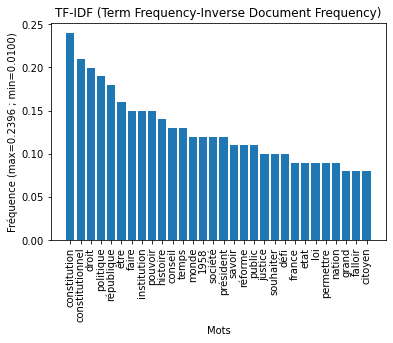

In [6]:
import matplotlib.pyplot as plt

def plot_tfidf(df_tfidf, size):

    max_value = float(df_tfidf.max().values)
    min_value = float(df_tfidf.min().values)
    x_labels = df_tfidf.index[:size]
    y_values = df_tfidf.values.reshape(len(df_tfidf))[:size]

    fig,ax = plt.subplots()
    ax.bar(x_labels, y_values)
    ax.set_xlabel("Mots")
    ax.set_ylabel("Fréquence (max={0:.4f} ; min={1:.4f})".format(max_value, min_value))
    ax.set_title("TF-IDF (Term Frequency-Inverse Document Frequency)")
    plt.xticks([x for x in x_labels], rotation=90)
    plt.show()
    return

plot_tfidf(df_tfidf, 30)

In [7]:
#nltk.download('punkt')
sid = SentimentIntensityAnalyzer()

sentences = [sentence.text for sentence in doc.sents]

df_positivity = pd.DataFrame(columns=["phrase","positivité","neg","neu","pos"])

for sentence in sentences:
    scores = sid.polarity_scores(sentence)
    df_positivity = df_positivity.append({"phrase":sentence, "positivité":scores['compound'], "neg":scores['neg'],"neu":scores['neu'],"pos":scores['pos']},ignore_index=True)

len(df_positivity)

166

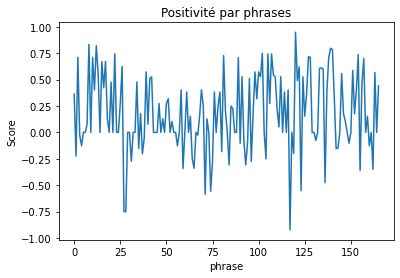

In [8]:
def plot_pos_by_sentences(df):

    x_labels = df.index
    y_values = df.values.reshape(len(df))

    fig,ax = plt.subplots()
    ax.plot(x_labels, y_values)
    ax.set_xlabel("phrase")
    ax.set_ylabel("Score")
    ax.set_title("Positivité par phrases")
    plt.show()
    return

plot_pos_by_sentences(df_positivity['positivité'])

In [9]:
from transformers import pipeline

analyzer = pipeline(
    task='text-classification',
    model="cmarkea/distilcamembert-base-sentiment",
    tokenizer="cmarkea/distilcamembert-base-sentiment"
)
result = analyzer(
    "J'aime me promener en forêt même si ça me donne mal aux pieds.",
    return_all_scores=False
)


df_camembert = pd.DataFrame(columns=["phrase","label","score"])

for sentence in sentences:
    result = analyzer(sentence,return_all_scores=False)
    df_camembert = df_camembert.append({"phrase":sentence, "label":result[0]['label'], "score":result[0]['score']},ignore_index=True)

len(df_camembert)

C:\Users\astie\anaconda3\lib\site-packages\transformers\pipelines\text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar funcionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


166

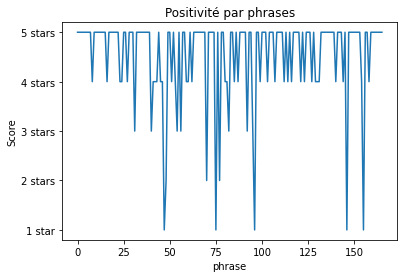

None


In [10]:
def plot_camembert(df):
    x_labels = df.index
    y_values = df.values.reshape(len(df))

    y_Idx = np.where(np.unique(y_values) == np.expand_dims(y_values,-1))[1]

    fig,ax = plt.subplots()
    ax.plot(x_labels, y_Idx)
    ax.set_xlabel("phrase")
    ax.set_ylabel("Score")
    ax.set_title("Positivité par phrases")
    plt.yticks(np.arange(5),np.unique(y_values))
    plt.show()
    return

print(plot_camembert(df_camembert['label']))

In [19]:
nlp = spacy.load('fr_core_news_lg')

def get_entities(text):
    doc = nlp(str(text))
    return [ent for ent in doc.ents]

def get_nouns(text):
    doc = nlp(str(text))
    return [token for token in doc if token.pos_ == "NOUN"]

def get_subject(text):
    doc = nlp(str(text))
    return [token for token in doc if token.dep_ == "nsubj"]

df_spacy = df_camembert.copy()

df_spacy['nouns'] = np.vectorize(get_nouns)(df_spacy.phrase)
#df_spacy['subjects'] = np.vectorize(get_subject)(df_spacy.phrase)
df_spacy['entities'] = np.vectorize(get_entities)(df_spacy.phrase)

df_spacy

C:\Users\astie\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


,phrase,label,score,nouns,entities
0,Merci Monsieur le Président du Conseil constit...,5 stars,0.555824,"[Merci, Monsieur, Président, Conseil, mots]","[(Merci, Monsieur), (Conseil)]"
1,"Mesdames, Messieurs,Chers Amis,Le 4 octobre 19...",5 stars,0.580895,"[Mesdames, Messieurs, Amis, octobre, effet, Co...","[(Messieurs), (Chers, Amis), (Le, 4, octobre, ..."
2,Ce n’était pas là une Constitution de temps de...,5 stars,0.652277,"[Constitution, temps, paix, Constitution, eaux...","[(Constitution), (Constitution), (Constitution)]"
3,Nous considérons souvent le texte constitution...,5 stars,0.581786,"[texte, révérence, textes, fondateurs, hommes]",[]
4,Mais le texte de 1958 est d’abord celui d’un é...,5 stars,0.593268,"[texte, élan, mouvement, rénovation, instituti...",[]
...,...,...,...,...,...
161,Car cette Constitution a transformé l'histoire...,5 stars,0.532335,"[Constitution, histoire, droit]",[(Constitution)]
162,"Et c’est là sa part la plus révolutionnaire, l...",5 stars,0.816493,"[part, somme, monde, recul, droits]",[]
163,"La France dispose, face aux déferlantes de l’H...",5 stars,0.617813,"[face, déferlantes, Histoire, socle, stabilité...","[(La, France), (Constitution)]"
164,"A ces tentations, opposons le sens du temps lo...",5 stars,0.361048,"[tentations, sens, temps, droit, Histoire]","[(l’, Histoire)]"
